![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter

import statsmodels.api as sm

In [2]:
#IMPORT EQUITY PRICES
prices_df = pd.read_csv('VALE.csv')

In [3]:
#DATAFRAME FOR VISUAL INSPECTION
prices_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-03-21,0.926192,0.926192,0.926192,0.926192,0,0.0,0.0
1,2002-03-22,0.917616,0.917616,0.889487,0.897034,44247600,0.0,0.0
2,2002-03-25,0.893604,0.900464,0.891889,0.897034,7429200,0.0,0.0
3,2002-03-26,0.897034,0.921047,0.897034,0.920704,4604400,0.0,0.0
4,2002-03-27,0.924476,0.951919,0.919331,0.934767,13928400,0.0,0.0
...,...,...,...,...,...,...,...,...
5152,2022-09-07,12.000000,12.340000,11.720000,12.270000,23277100,0.0,0.0
5153,2022-09-08,12.300000,12.410000,12.140000,12.340000,29064100,0.0,0.0
5154,2022-09-09,12.790000,13.540000,12.740000,13.510000,44432700,0.0,0.0
5155,2022-09-12,13.710000,13.790000,13.490000,13.780000,32677400,0.0,0.0


In [4]:
#CALCULATION EXAMPLE - ROLLING MAXIMUM, ROLLING MINIMUM AND RELATIVE POSITION
prices_df2 = prices_df.copy()

prices_df2['MAX'] = prices_df2['High'].rolling(window=16).max()
prices_df2['MIN'] = prices_df2['Low'].rolling(window=16).min()
prices_df2['POS_REL'] = (prices_df2['Close']-prices_df2['MIN'])/(prices_df2['MAX']-prices_df2['MIN'])

In [5]:
#DATAFRAME FOR VISUAL INSPECTION
prices_df2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MAX,MIN,POS_REL
0,2002-03-21,0.926192,0.926192,0.926192,0.926192,0,0.0,0.0,NaN,NaN,NaN
1,2002-03-22,0.917616,0.917616,0.889487,0.897034,44247600,0.0,0.0,NaN,NaN,NaN
2,2002-03-25,0.893604,0.900464,0.891889,0.897034,7429200,0.0,0.0,NaN,NaN,NaN
3,2002-03-26,0.897034,0.921047,0.897034,0.920704,4604400,0.0,0.0,NaN,NaN,NaN
4,2002-03-27,0.924476,0.951919,0.919331,0.934767,13928400,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5152,2022-09-07,12.000000,12.340000,11.720000,12.270000,23277100,0.0,0.0,13.92,11.72,0.250000
5153,2022-09-08,12.300000,12.410000,12.140000,12.340000,29064100,0.0,0.0,13.92,11.72,0.281818
5154,2022-09-09,12.790000,13.540000,12.740000,13.510000,44432700,0.0,0.0,13.92,11.72,0.813636
5155,2022-09-12,13.710000,13.790000,13.490000,13.780000,32677400,0.0,0.0,13.92,11.72,0.936363


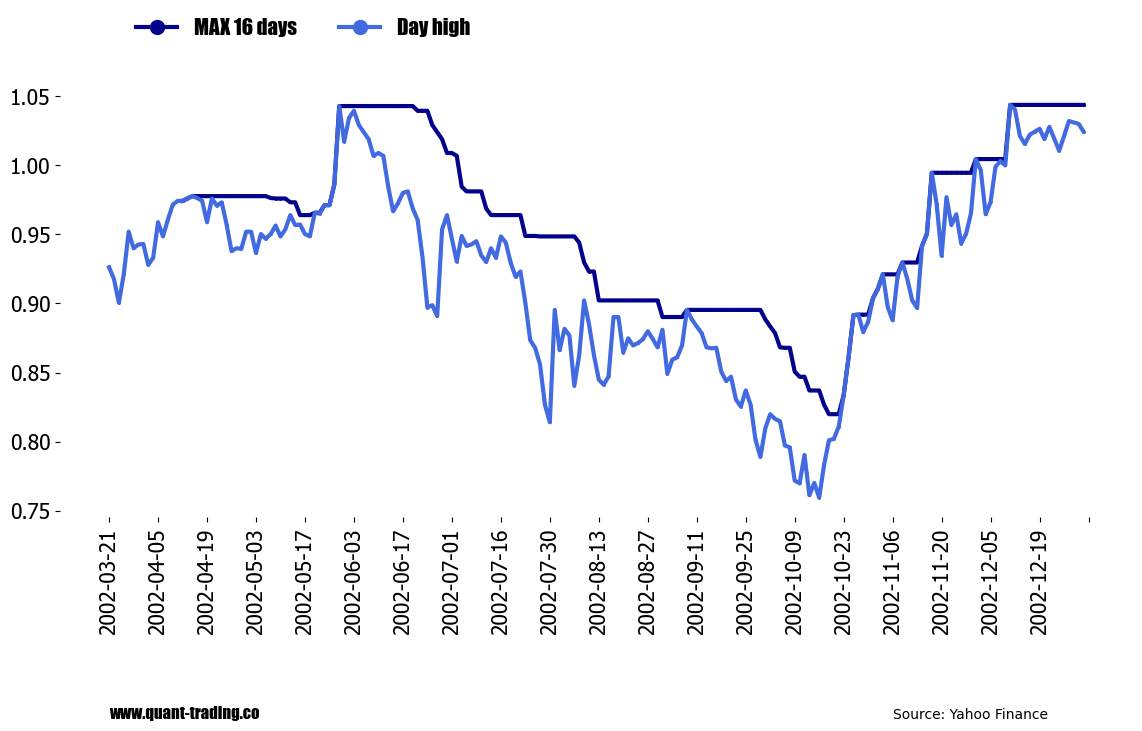

In [6]:
#------------------------CHART - ROLLING MAXIMUM AND DAILY HIGH-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(prices_df2['Date'].head(200),prices_df2['MAX'].head(200),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='MAX 16 days',markersize=1)
ax1.plot(prices_df2['Date'].head(200),prices_df2['High'].head(200),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='Day high',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.text(prices_df2['Date'].head(200).iloc[-200], 0.6,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
plt.text(prices_df2['Date'].head(200).iloc[-40], 0.6,'Source: Yahoo Finance' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

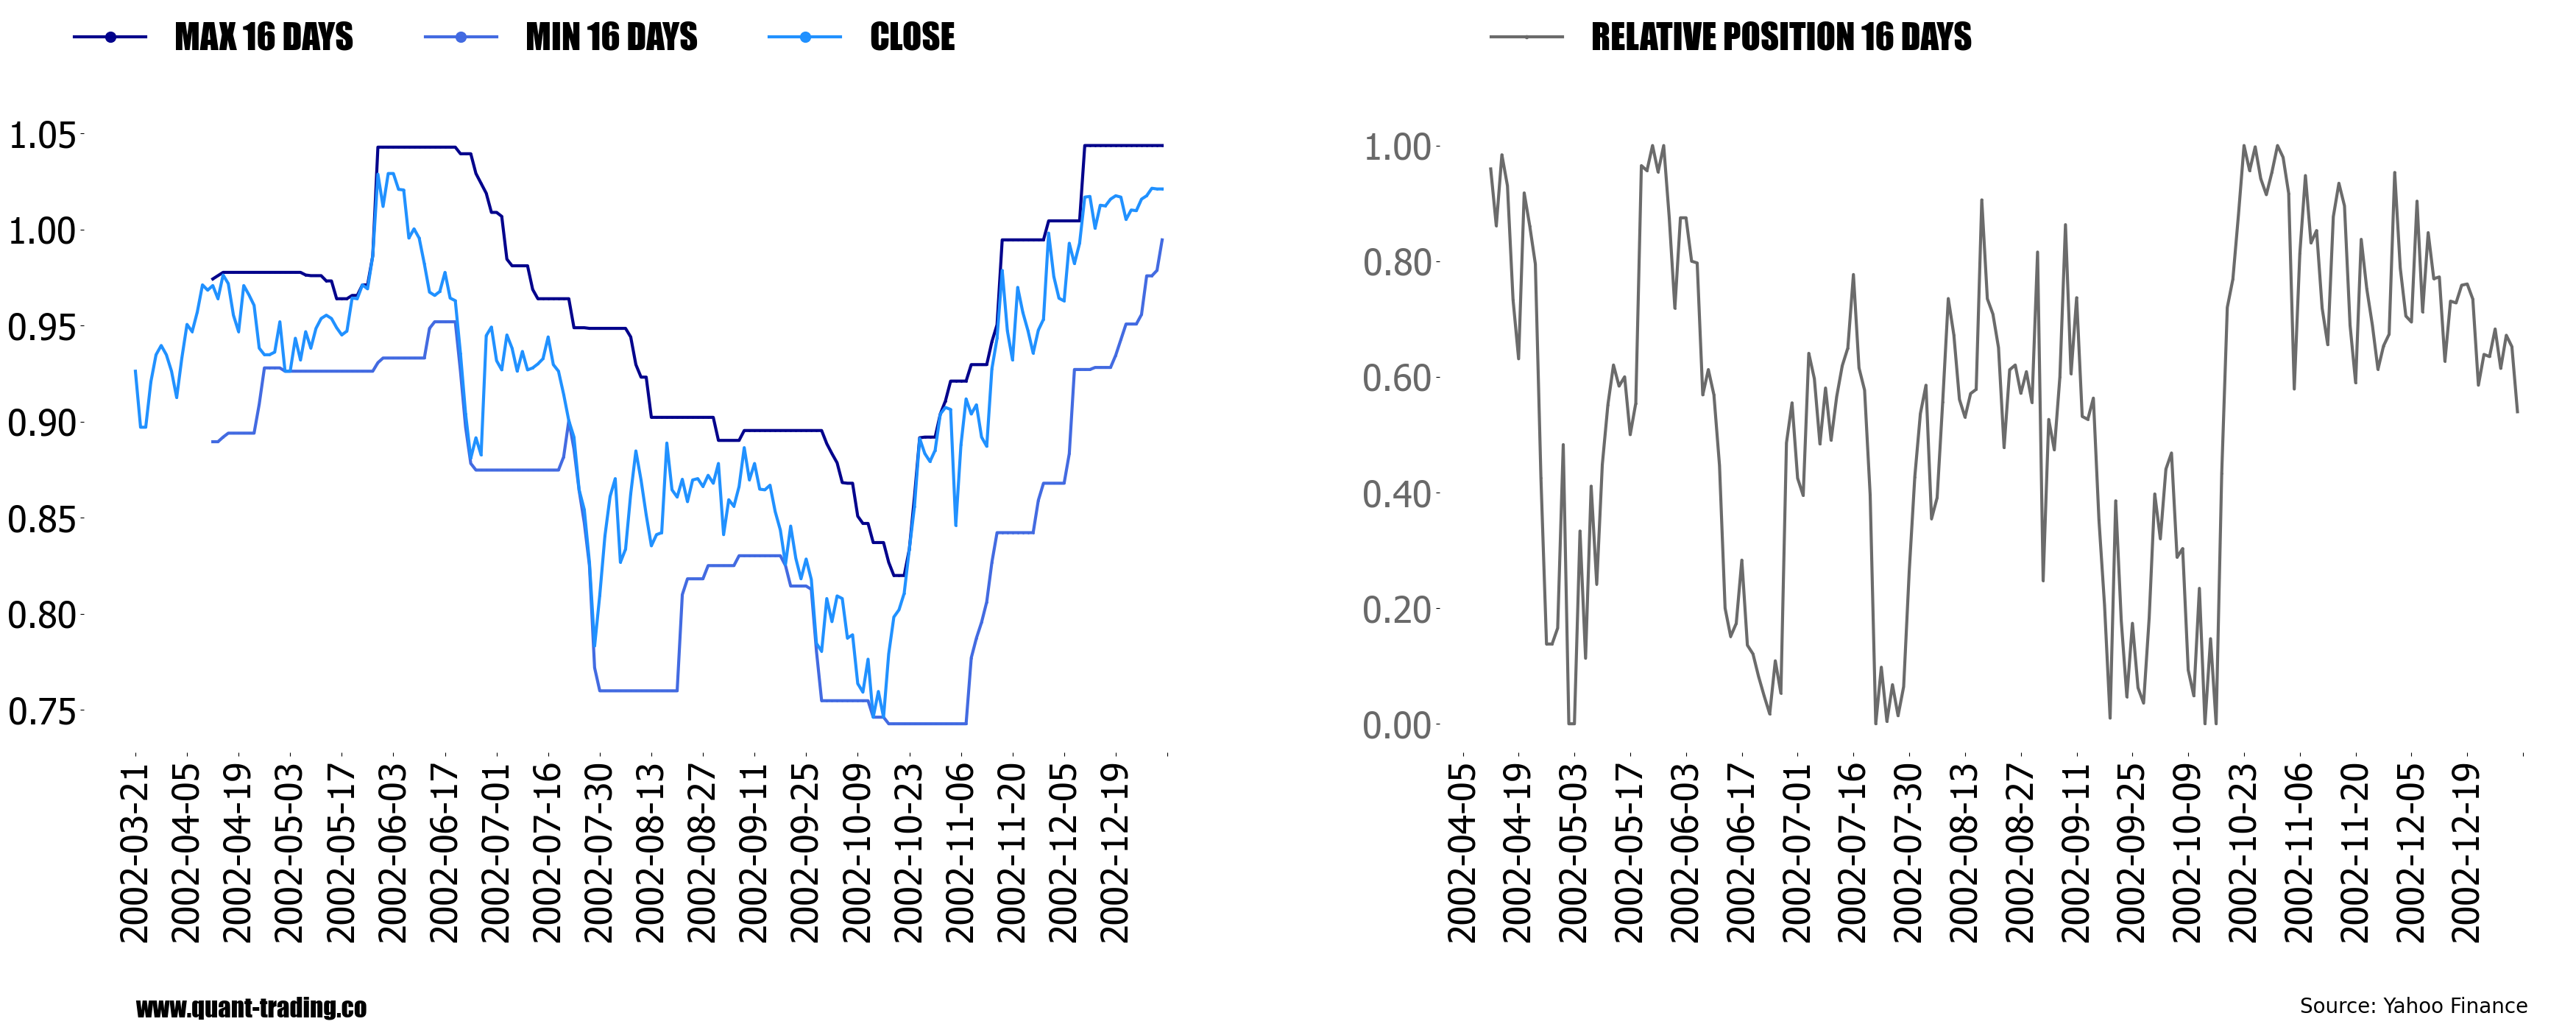

In [7]:
#------------------------CHART - ROLLING MAX AND MIN - RELATIVE POSITION-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=35)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.plot(prices_df2['Date'].head(200),prices_df2['MAX'].head(200),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='MAX 16 DAYS',markersize=1)
ax1.plot(prices_df2['Date'].head(200),prices_df2['MIN'].head(200),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='MIN 16 DAYS',markersize=1)
ax1.plot(prices_df2['Date'].head(200),prices_df2['Close'].head(200),marker='o', linestyle='solid',linewidth=3,color='dodgerblue',alpha=0.99,label='CLOSE',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.8, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=35)
plt.xticks(fontname = "Tahoma",fontsize=35)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(prices_df2['Date'].head(200),prices_df2['POS_REL'].head(200),marker='o', linestyle='solid',linewidth=3,color='dimgrey',alpha=0.99,label='RELATIVE POSITION 16 DAYS',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=35, color='dimgrey')
plt.xticks(fontname = "Tahoma",fontsize=35)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax1.text(prices_df2['Date'].head(200).iloc[-200], 0.59,'www.quant-trading.co' , color='black', fontsize=25,family='Impact')
ax2.text(prices_df2['Date'].head(200).iloc[-40], -0.5,'Source: Yahoo Finance' , color='black', fontsize=20)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

plt.show()

In [8]:
#CALCULATION EXAMPLE - DIFFERENT ROLLING PERIODS WITH THEIR RESPECTIVE ROLLING MAX-MIN AND RELATIVE POSITION

n = [1,2,4,8,16,32,64]

for k in range(0,len(n)):    
    prices_df['MAX'+str(n[k])] = prices_df['High'].rolling(window=n[k]).max()
    prices_df['MIN'+str(n[k])] = prices_df['Low'].rolling(window=n[k]).min()
    prices_df['POS_REL'+str(n[k])] = (prices_df['Close']-prices_df['MIN'+str(n[k])])/(prices_df['MAX'+str(n[k])]-prices_df['MIN'+str(n[k])])

In [9]:
#DATAFRAME FOR VISUAL INSPECTION
prices_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MAX1,MIN1,...,POS_REL8,MAX16,MIN16,POS_REL16,MAX32,MIN32,POS_REL32,MAX64,MIN64,POS_REL64
0,2002-03-21,0.926192,0.926192,0.926192,0.926192,0,0.0,0.0,0.926192,0.926192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-22,0.917616,0.917616,0.889487,0.897034,44247600,0.0,0.0,0.917616,0.889487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-25,0.893604,0.900464,0.891889,0.897034,7429200,0.0,0.0,0.900464,0.891889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-26,0.897034,0.921047,0.897034,0.920704,4604400,0.0,0.0,0.921047,0.897034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-27,0.924476,0.951919,0.919331,0.934767,13928400,0.0,0.0,0.951919,0.919331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2022-09-07,12.000000,12.340000,11.720000,12.270000,23277100,0.0,0.0,12.340000,11.720000,...,0.250000,13.92,11.72,0.250000,13.92,11.72,0.250000,17.735472,11.601756,0.108946
5153,2022-09-08,12.300000,12.410000,12.140000,12.340000,29064100,0.0,0.0,12.410000,12.140000,...,0.364706,13.92,11.72,0.281818,13.92,11.72,0.281818,17.678414,11.601756,0.121488
5154,2022-09-09,12.790000,13.540000,12.740000,13.510000,44432700,0.0,0.0,13.540000,12.740000,...,0.983517,13.92,11.72,0.813636,13.92,11.72,0.813636,16.717940,11.601756,0.372982
5155,2022-09-12,13.710000,13.790000,13.490000,13.780000,32677400,0.0,0.0,13.790000,13.490000,...,0.995169,13.92,11.72,0.936363,13.92,11.72,0.936363,16.204421,11.601756,0.473257


In [10]:
#PARAMETERS INITIALIZATION
minmove = 0.1
thresh = 1 + minmove
prices_df['SIDE'] = np.nan
highprc = prices_df['Close'].iloc[0]
lowprc = prices_df['Close'].iloc[0]
highpos = 0
lowpos = 0

In [11]:
#CALCULATE THE FIRST POSITION
for i in range(1,prices_df.shape[0]):
    if prices_df['Close'].iloc[i] >= highprc:
        highprc = prices_df['Close'].iloc[i]
        highpos = i
        if lowprc <= thresh * highprc:
            initpos = i
            state = 1           
            break
    elif prices_df['Close'].iloc[i] < lowprc:
        lowprc = prices_df['Close'].iloc[i]
        lowpos = i
        if highprc >= thresh * lowprc:
            initpos = i
            state = 0
            break

In [12]:
#CALCULATE THE FOLLOWING POSITIONS
for cpos in range(initpos,prices_df.shape[0]):
    if state == 1:
        if highprc/prices_df['Close'].iloc[cpos] >=thresh:
            for j in range(lowpos,highpos):
                prices_df['SIDE'].iloc[j] = state
            state = 0
            lowprc = prices_df['Close'].iloc[cpos]
            lowpos = cpos
        elif prices_df['Close'].iloc[cpos] > highprc:
            highpos= cpos
            highprc = prices_df['Close'].iloc[cpos]
    else:
        if prices_df['Close'].iloc[cpos]/lowprc >= thresh:
            for j in range(highpos,lowpos):
                prices_df['SIDE'].iloc[j] = state
            state = 1
            highprc = prices_df['Close'].iloc[cpos]
            highpos = cpos
        else:
            if prices_df['Close'].iloc[cpos] < lowprc:
                lowpos = cpos
                lowprc = prices_df['Close'].iloc[cpos]

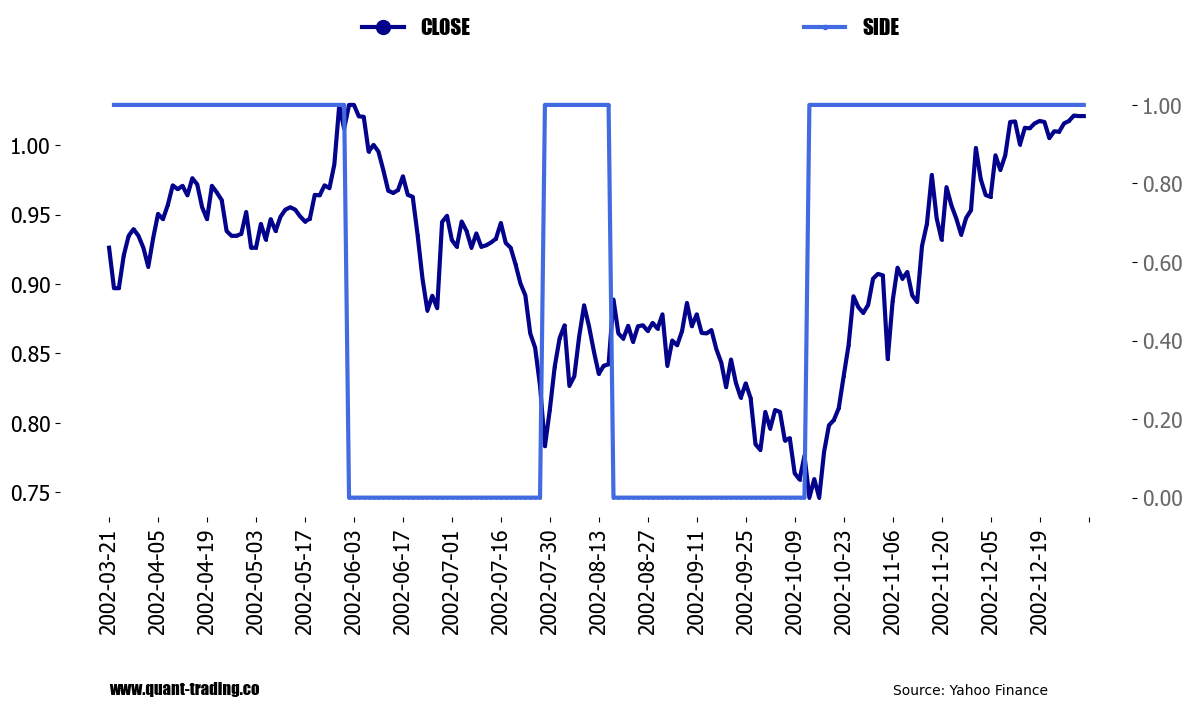

In [13]:
#------------------------CHART - EXAMPLE OF THE SIDE VARIABLE-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(prices_df['Date'].head(200),prices_df['Close'].head(200),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='CLOSE',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(prices_df['Date'].head(200),prices_df['SIDE'].head(200),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='SIDE',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.8, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15, color='dimgrey')
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.text(prices_df2['Date'].head(200).iloc[-200], -0.5,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
plt.text(prices_df2['Date'].head(200).iloc[-40], -0.5,'Source: Yahoo Finance' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

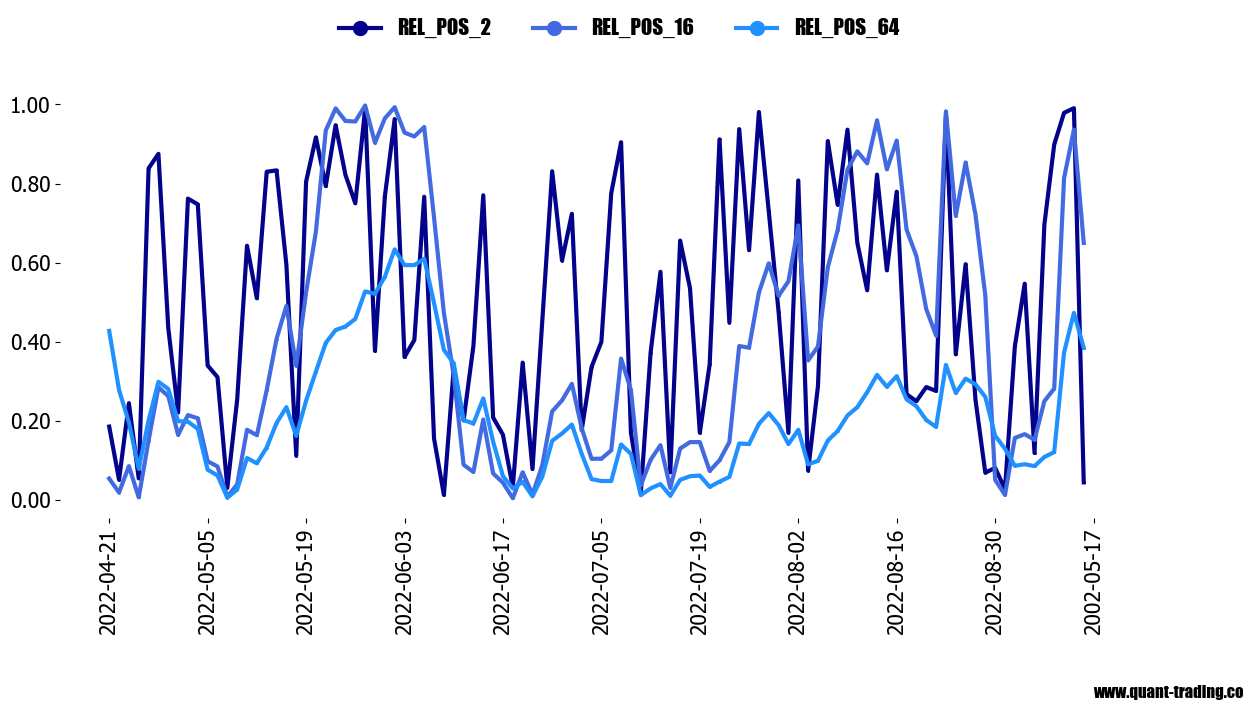

In [14]:
#------------------------CHART - RELATIVE POSITIONS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(prices_df['Date'].tail(100),prices_df['POS_REL2'].tail(100),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='REL_POS_2',markersize=1)
ax1.plot(prices_df['Date'].tail(100),prices_df['POS_REL16'].tail(100),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='REL_POS_16',markersize=1)
ax1.plot(prices_df['Date'].tail(100),prices_df['POS_REL64'].tail(100),marker='o', linestyle='solid',linewidth=3,color='dodgerblue',alpha=0.99,label='REL_POS_64',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.8, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.text(prices_df['Date'].head(100).iloc[-60], -0.5,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [15]:
# IN SAMPLE DATAFRAME
rows = 5157
in_sample_rows = 4500

prices_df_is = prices_df.iloc[n[k]:in_sample_rows]
prices_df_is['Intercept'] = 1

In [16]:
# LOGISTIC REGRESSION
logit = sm.Logit(prices_df_is['SIDE'], prices_df_is[['Intercept','POS_REL8','POS_REL16','POS_REL32','POS_REL64']])
logit_res = logit.fit()
logit_res.summary()

predict_is = logit_res.predict(prices_df_is[['Intercept','POS_REL8','POS_REL16','POS_REL32','POS_REL64']])

prices_df_is['PRED'] = predict_is
prices_df_is['LINE'] = 0.5

Optimization terminated successfully.
         Current function value: 0.570880
         Iterations 5


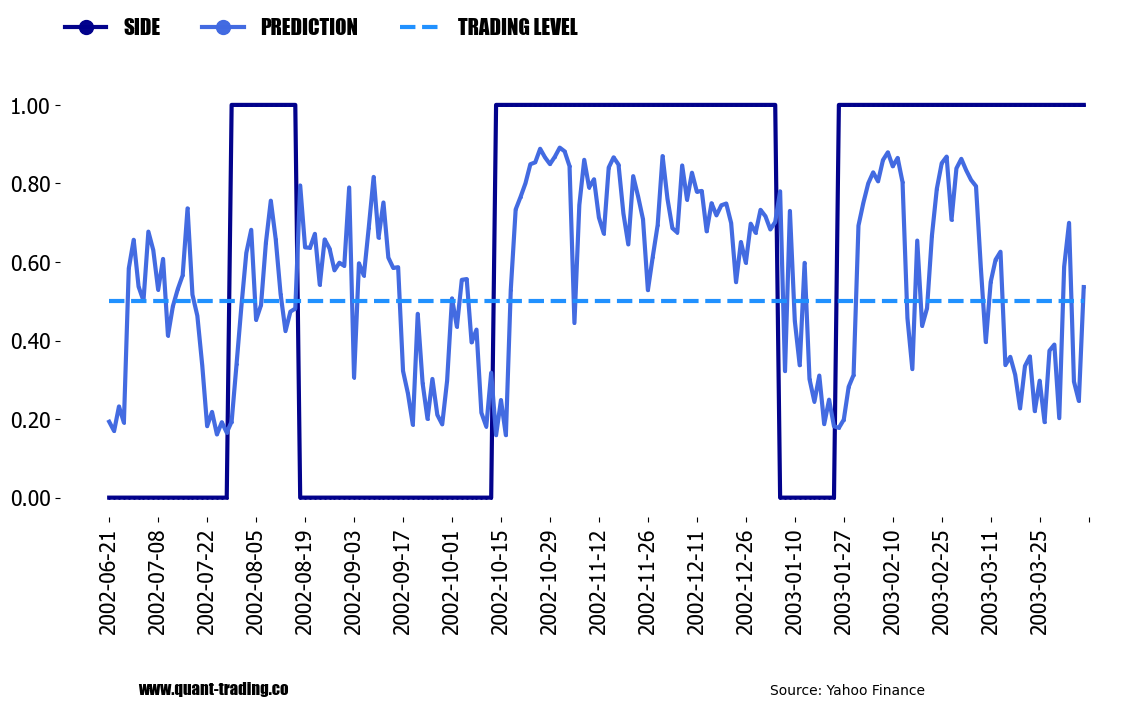

In [17]:
#------------------------CHART - SIDE, PREDICTION AND TRADING LEVEL-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(prices_df_is['Date'].head(200),prices_df_is['SIDE'].head(200),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SIDE',markersize=1)
ax1.plot(prices_df_is['Date'].head(200),prices_df_is['PRED'].head(200),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='PREDICTION',markersize=1)
ax1.plot(prices_df_is['Date'].head(200),prices_df_is['LINE'].head(200),marker=None, linestyle='dashed',linewidth=3,color='dodgerblue',alpha=0.99,label='TRADING LEVEL',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)


plt.text(prices_df['Date'].head(200).iloc[-130], -0.5,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
plt.text(prices_df['Date'].head(200).iloc[-1], -0.5,'Source: Yahoo Finance' , color='black', fontsize=10)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [18]:
# OUT OF THE SAMPLE DATAFRAME
out_of_sample_rows = rows - in_sample_rows
prices_df_os = prices_df.iloc[in_sample_rows+1:rows-1]
prices_df_os['Intercept'] = 1

predict_os = logit_res.predict(prices_df_os[['Intercept','POS_REL8','POS_REL16','POS_REL32','POS_REL64']])
prices_df_os['PRED'] = predict_os
prices_df_os['LINE'] = 0.5

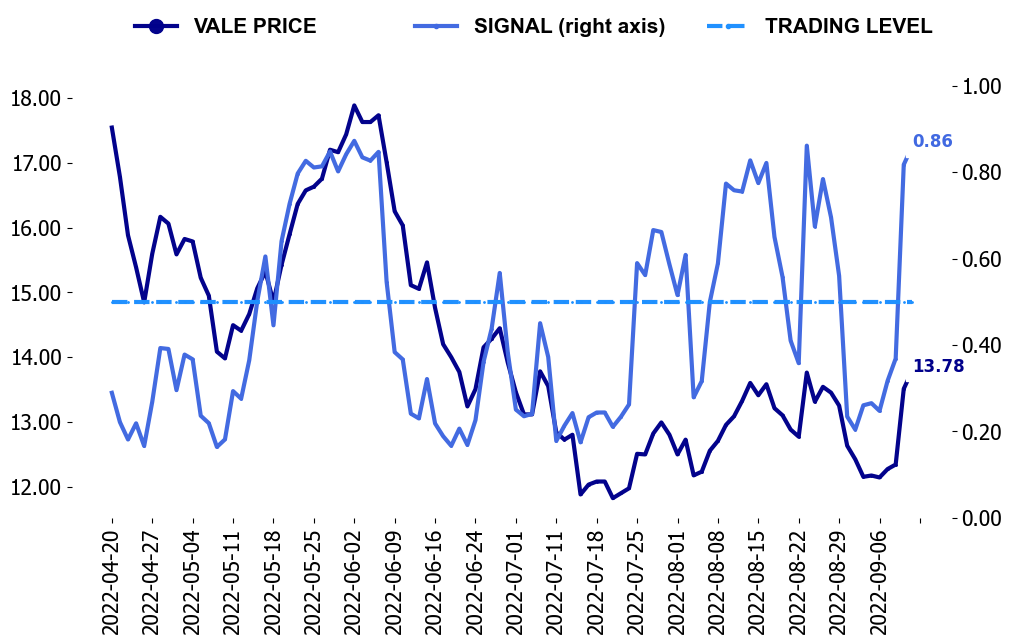

In [19]:
#------------------------CHART -  VALE PRICE VS TRADING SIGNAL-----------------------------------#
font = font_manager.FontProperties(family='Arial',weight='bold', style='normal', size=15)
tick_spacing1 = 5


fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(prices_df_os['Date'].tail(100),prices_df_os['Close'].tail(100),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='VALE PRICE',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(prices_df_os['Date'].tail(100),prices_df_os['PRED'].tail(100),marker='o',linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='SIGNAL (right axis)',markersize=1)
ax2.plot(prices_df_os['Date'].tail(100),prices_df_os['LINE'].tail(100),marker='o',linestyle='dashed',linewidth=3,color='dodgerblue',alpha=0.99,label='TRADING LEVEL',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, 0, 1])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax1.text(prices_df_os['Date'].iloc[-1],prices_df_os['Close'].iloc[-1], '{0:.2f}'.format(prices_df_os['Close'].iloc[-1]), color='darkblue', fontsize=12,weight='bold',backgroundcolor='white')
ax2.text(prices_df_os['Date'].iloc[-1],prices_df_os['PRED'].iloc[-1], '{0:.2f}'.format(prices_df_os['PRED'].iloc[-1]), color='royalblue', fontsize=12,weight='bold',backgroundcolor='white')

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=1.5, top=1.0)

plt.show()

In [20]:
#PARAMETERS
UPSIDE_ENTRY = 0.50
DOWNSIDE_ENTRY = 0.50
OUT_LEVEL_LONG = 0.50
OUT_LEVEL_SHORT = 0.50

prices_df_is['Position'] = ""
prices_df_is['Trade'] = ""
prices_df_is['Position'].iloc[0]  = 'FLAT' 
Position = 'FLAT'
Trade = 'NTG'


def calculate_position(PRED):  

        global Position
        global Trade     

        if Position == 'FLAT':        
            if PRED > UPSIDE_ENTRY:
                Trade = 'BUY'
                Position = 'LONG'
            elif PRED < DOWNSIDE_ENTRY:
                Trade = 'SELL'
                Position = 'SHORT'
            else: 
                Trade = 'NTG'
                Position = 'FLAT'

        elif Position == 'SHORT':
            if PRED > OUT_LEVEL_SHORT:
                Trade = 'BUY'
                Position = 'FLAT'
            else: 
                Trade = 'NTG'
                Position = 'SHORT'

        elif Position == 'LONG':    
            if PRED < OUT_LEVEL_LONG:
                Trade = 'SELL'
                Position = 'FLAT'
            else: 
                Trade = 'NTG'
                Position = 'LONG'       

        return Position, Trade
    
#TRADING RETURNS
results = prices_df_is.apply(lambda row: calculate_position(PRED=row['PRED']),axis=1)
prices_df_is['Position'] = [x[0] for x in results]
prices_df_is['Trade'] = [x[1] for x in results]

df_trades = prices_df_is[prices_df_is['Position'].isin(['LONG', 'SHORT']) | prices_df_is['Trade'].isin(['BUY', 'SELL'])]  # Only rows that have a long or short position

# Calcula el retorno
df_trades['return'] = df_trades['Close'].shift(-1) / df_trades['Close'] - 1

# Define las condiciones y elecciones
conditions = [
    (df_trades['Position'] == 'SHORT'),
    (df_trades['Position'] == 'LONG'),
    (df_trades['Position'] == 'FLAT') & (df_trades['Trade'] == 'BUY'),
    (df_trades['Position'] == 'FLAT') & (df_trades['Trade'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

# Usa np.select para asignar el valor de return_sign
df_trades['return_sign'] = np.select(conditions, choices, default=0.0)  # Cambia 'null' por 0.0

# Asegúrate de que 'return_sign' sea de tipo float
df_trades['return_sign'] = df_trades['return_sign'].astype(float)

# Ajusta 'return' según las condiciones específicas
df_trades.loc[
    (df_trades['Position'] == 'SHORT') & (df_trades['Trade'] == 'SELL') |
    (df_trades['Position'] == 'LONG') & (df_trades['Trade'] == 'BUY'),
    'return'
] = 0

# Calcula el retorno ajustado y el retorno acumulado
df_trades['return2'] = df_trades['return'] * df_trades['return_sign']
df_trades['cum_return'] = df_trades['return2'].cumsum()

In [21]:
#DATAFRAME FOR VISUAL INSPECTION
df_trades.tail(50)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MAX1,MIN1,...,SIDE,Intercept,PRED,LINE,Position,Trade,return,return_sign,return2,cum_return
4450,2019-11-21,8.567250,8.680374,8.499376,8.650208,15263700,0.000,0.0,8.680374,8.499376,...,1.0,1,0.530719,0.5,FLAT,BUY,0.036617,1.0,0.036617,0.890973
4451,2019-11-22,8.899080,8.997121,8.853830,8.966954,30538500,0.000,0.0,8.997121,8.853830,...,1.0,1,0.740527,0.5,LONG,BUY,0.000000,-1.0,-0.000000,0.890973
4452,2019-11-25,9.064995,9.155494,9.034828,9.072536,18666900,0.000,0.0,9.155494,9.034828,...,1.0,1,0.768225,0.5,LONG,NTG,0.000000,-1.0,-0.000000,0.890973
4453,2019-11-26,9.027287,9.110245,8.921705,9.072536,26175800,0.000,0.0,9.110245,8.921705,...,1.0,1,0.768121,0.5,LONG,NTG,-0.013300,-1.0,0.013300,0.904273
4454,2019-11-27,8.989579,8.997121,8.838747,8.951871,15572600,0.000,0.0,8.997121,8.838747,...,1.0,1,0.690913,0.5,LONG,NTG,-0.009267,-1.0,0.009267,0.913540
4455,2019-11-29,8.883996,8.944329,8.853830,8.868914,7450500,0.000,0.0,8.944329,8.853830,...,1.0,1,0.607855,0.5,LONG,NTG,0.032313,-1.0,-0.032313,0.881227
4456,2019-12-02,9.034829,9.208286,8.982038,9.155495,17935000,0.000,0.0,9.208286,8.982038,...,1.0,1,0.845238,0.5,LONG,NTG,-0.011532,-1.0,0.011532,0.892759
4457,2019-12-03,9.064995,9.087620,8.982037,9.049911,20077900,0.000,0.0,9.087620,8.982037,...,1.0,1,0.768722,0.5,LONG,NTG,0.008333,-1.0,-0.008333,0.884426
4458,2019-12-04,9.095162,9.155494,9.057454,9.125328,10652200,0.000,0.0,9.155494,9.057454,...,1.0,1,0.801707,0.5,LONG,NTG,0.001653,-1.0,-0.001653,0.882773
4459,2019-12-05,9.080078,9.185660,9.042370,9.140410,13333300,0.000,0.0,9.185660,9.042370,...,1.0,1,0.816552,0.5,LONG,NTG,0.022277,-1.0,-0.022277,0.860496


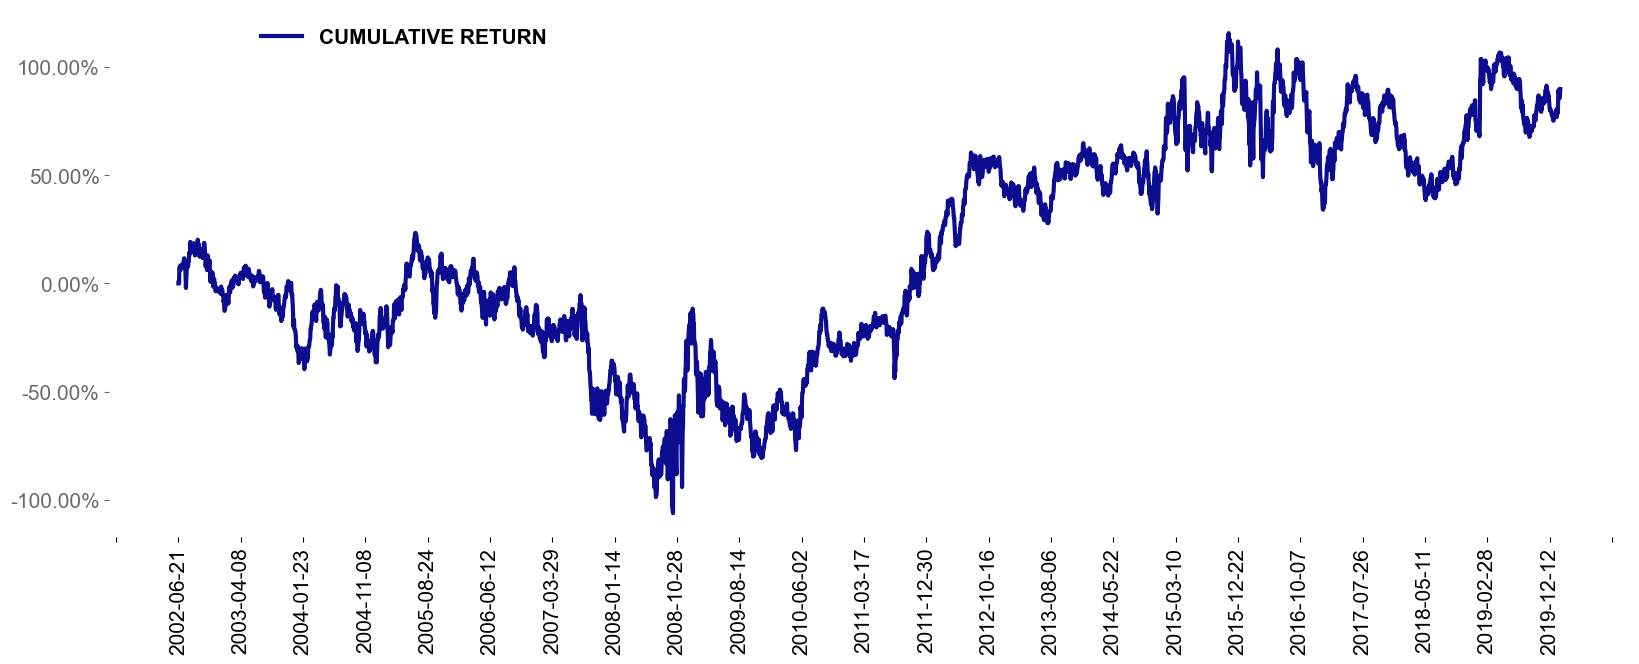

In [22]:
tick_spacing3 = 200

fig2 = plt.figure()
ax4 = fig2.add_subplot(1, 1, 1)
ax4.plot(df_trades['Date'],df_trades['cum_return'],marker='None', linestyle='solid',linewidth=3,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=1)
ax4.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.0),ncol=2,markerscale=3)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
ax4.axis([None, None, None, None])
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax4.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=2.5, top=1.2)

plt.show()

In [23]:
#PARAMETERS
UPSIDE_ENTRY = 0.70
DOWNSIDE_ENTRY = 0.30
OUT_LEVEL_LONG = 0.30
OUT_LEVEL_SHORT = 0.70

prices_df_is['Position'] = ""
prices_df_is['Trade'] = ""
prices_df_is['Position'].iloc[0]  = 'FLAT' 
Position = 'FLAT'
Trade = 'NTG'


def calculate_position(PRED):  

        global Position
        global Trade     

        if Position == 'FLAT':        
            if PRED > UPSIDE_ENTRY:
                Trade = 'BUY'
                Position = 'LONG'
            elif PRED < DOWNSIDE_ENTRY:
                Trade = 'SELL'
                Position = 'SHORT'
            else: 
                Trade = 'NTG'
                Position = 'FLAT'

        elif Position == 'SHORT':
            if PRED > OUT_LEVEL_SHORT:
                Trade = 'BUY'
                Position = 'FLAT'
            else: 
                Trade = 'NTG'
                Position = 'SHORT'

        elif Position == 'LONG':    
            if PRED < OUT_LEVEL_LONG:
                Trade = 'SELL'
                Position = 'FLAT'
            else: 
                Trade = 'NTG'
                Position = 'LONG'       

        return Position, Trade
    
#TRADING RETURNS
results = prices_df_is.apply(lambda row: calculate_position(PRED=row['PRED']),axis=1)
prices_df_is['Position'] = [x[0] for x in results]
prices_df_is['Trade'] = [x[1] for x in results]

# Filtra las filas relevantes
df_trades = prices_df_is[
    prices_df_is['Position'].isin(['LONG', 'SHORT']) |
    prices_df_is['Trade'].isin(['BUY', 'SELL'])
]

# Calcula el retorno
df_trades['return'] = df_trades['Close'].shift(-1) / df_trades['Close'] - 1

# Define las condiciones y elecciones
conditions = [
    (df_trades['Position'] == 'SHORT'),
    (df_trades['Position'] == 'LONG'),
    (df_trades['Position'] == 'FLAT') & (df_trades['Trade'] == 'BUY'),
    (df_trades['Position'] == 'FLAT') & (df_trades['Trade'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

# Usa np.select para asignar el valor de return_sign
df_trades['return_sign'] = np.select(conditions, choices, default=0.0)  # Cambiado a 0.0

# Asegúrate de que 'return_sign' sea de tipo float
df_trades['return_sign'] = df_trades['return_sign'].astype(float)

# Ajusta 'return' según las condiciones específicas
df_trades.loc[
    ((df_trades['Position'] == 'SHORT') & (df_trades['Trade'] == 'SELL')) |
    ((df_trades['Position'] == 'LONG') & (df_trades['Trade'] == 'BUY')),
    'return'
] = 0

# Calcula el retorno ajustado y el retorno acumulado
df_trades['return2'] = df_trades['return'] * df_trades['return_sign']
df_trades['cum_return'] = df_trades['return2'].cumsum()

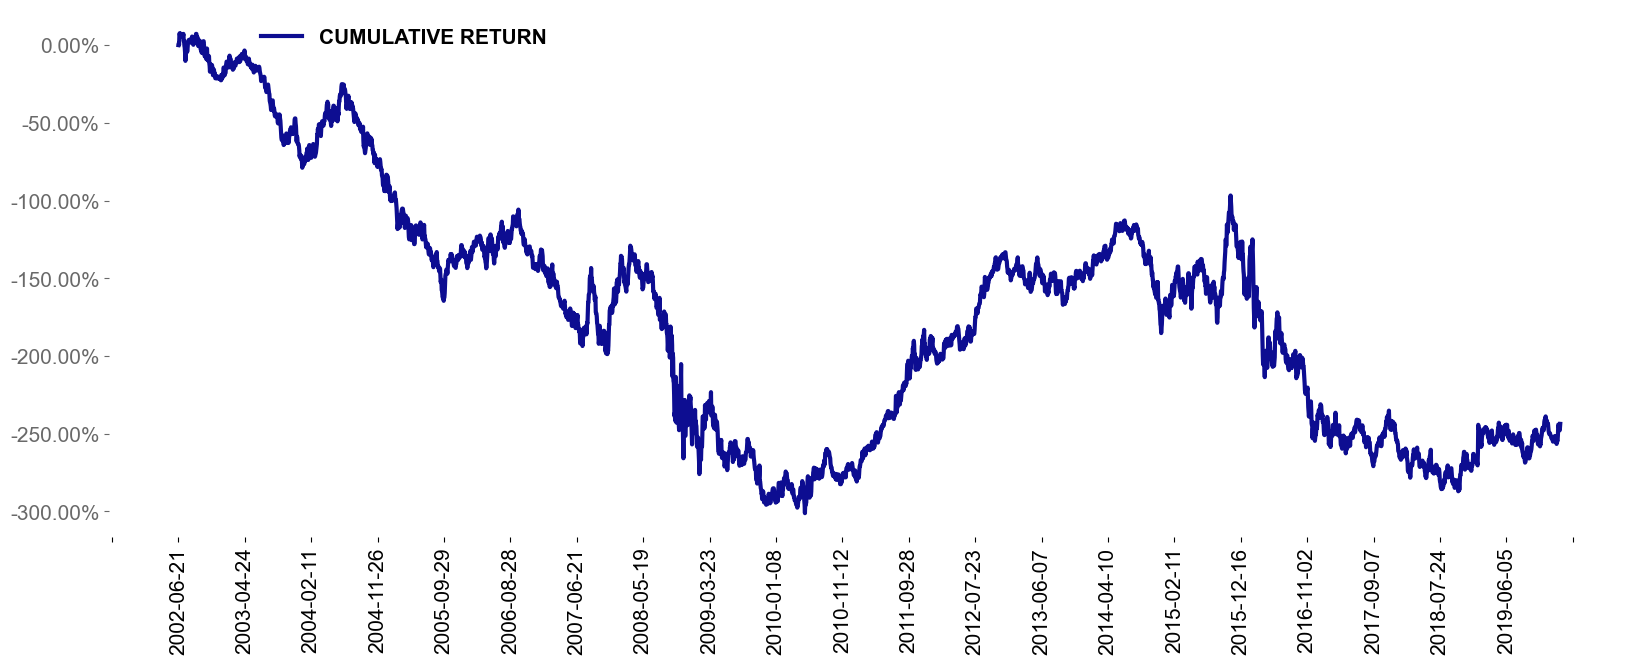

In [24]:
tick_spacing3 = 200

fig2 = plt.figure()
ax4 = fig2.add_subplot(1, 1, 1)
ax4.plot(df_trades['Date'],df_trades['cum_return'],marker='None', linestyle='solid',linewidth=3,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=1)
ax4.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.0),ncol=2,markerscale=3)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
ax4.axis([None, None, None, None])
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax4.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=2.5, top=1.2)

plt.show()

In [25]:
#PARAMETERS
UPSIDE_ENTRY = 0.70
DOWNSIDE_ENTRY = 0.30
OUT_LEVEL_LONG = 0.30
OUT_LEVEL_SHORT = 0.70

prices_df_os['Position'] = ""
prices_df_os['Trade'] = ""
prices_df_os['Position'].iloc[0]  = 'FLAT' 
Position = 'FLAT'
Trade = 'NTG'


def calculate_position(PRED):  

        global Position
        global Trade     

        if Position == 'FLAT':        
            if PRED > UPSIDE_ENTRY:
                Trade = 'BUY'
                Position = 'LONG'
            elif PRED < DOWNSIDE_ENTRY:
                Trade = 'SELL'
                Position = 'SHORT'
            else: 
                Trade = 'NTG'
                Position = 'FLAT'

        elif Position == 'SHORT':
            if PRED > OUT_LEVEL_SHORT:
                Trade = 'BUY'
                Position = 'FLAT'
            else: 
                Trade = 'NTG'
                Position = 'SHORT'

        elif Position == 'LONG':    
            if PRED < OUT_LEVEL_LONG:
                Trade = 'SELL'
                Position = 'FLAT'
            else: 
                Trade = 'NTG'
                Position = 'LONG'       

        return Position, Trade
    
#TRADING RETURNS
results = prices_df_os.apply(lambda row: calculate_position(PRED=row['PRED']),axis=1)
prices_df_os['Position'] = [x[0] for x in results]
prices_df_os['Trade'] = [x[1] for x in results]

# Filtra las filas relevantes
df_trades_os = prices_df_os[
    prices_df_os['Position'].isin(['LONG', 'SHORT']) |
    prices_df_os['Trade'].isin(['BUY', 'SELL'])
]

# Calcula el retorno
df_trades_os['return'] = df_trades_os['Close'].pct_change(-1)  # Uso pct_change para el retorno

# Define las condiciones y elecciones
conditions = [
    (df_trades_os['Position'] == 'SHORT'),
    (df_trades_os['Position'] == 'LONG'),
    (df_trades_os['Position'] == 'FLAT') & (df_trades_os['Trade'] == 'BUY'),
    (df_trades_os['Position'] == 'FLAT') & (df_trades_os['Trade'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

# Usa np.select para asignar el valor de return_sign
df_trades_os['return_sign'] = np.select(conditions, choices, default=0.0)  # Cambiado a 0.0

# Asegúrate de que 'return_sign' sea de tipo float
df_trades_os['return_sign'] = df_trades_os['return_sign'].astype(float)

# Ajusta 'return' según las condiciones específicas
df_trades_os.loc[
    ((df_trades_os['Position'] == 'SHORT') & (df_trades_os['Trade'] == 'SELL')) |
    ((df_trades_os['Position'] == 'LONG') & (df_trades_os['Trade'] == 'BUY')),
    'return'
] = 0

# Calcula el retorno ajustado y el retorno acumulado
df_trades_os['return2'] = df_trades_os['return'] * df_trades_os['return_sign']
df_trades_os['cum_return'] = df_trades_os['return2'].cumsum()

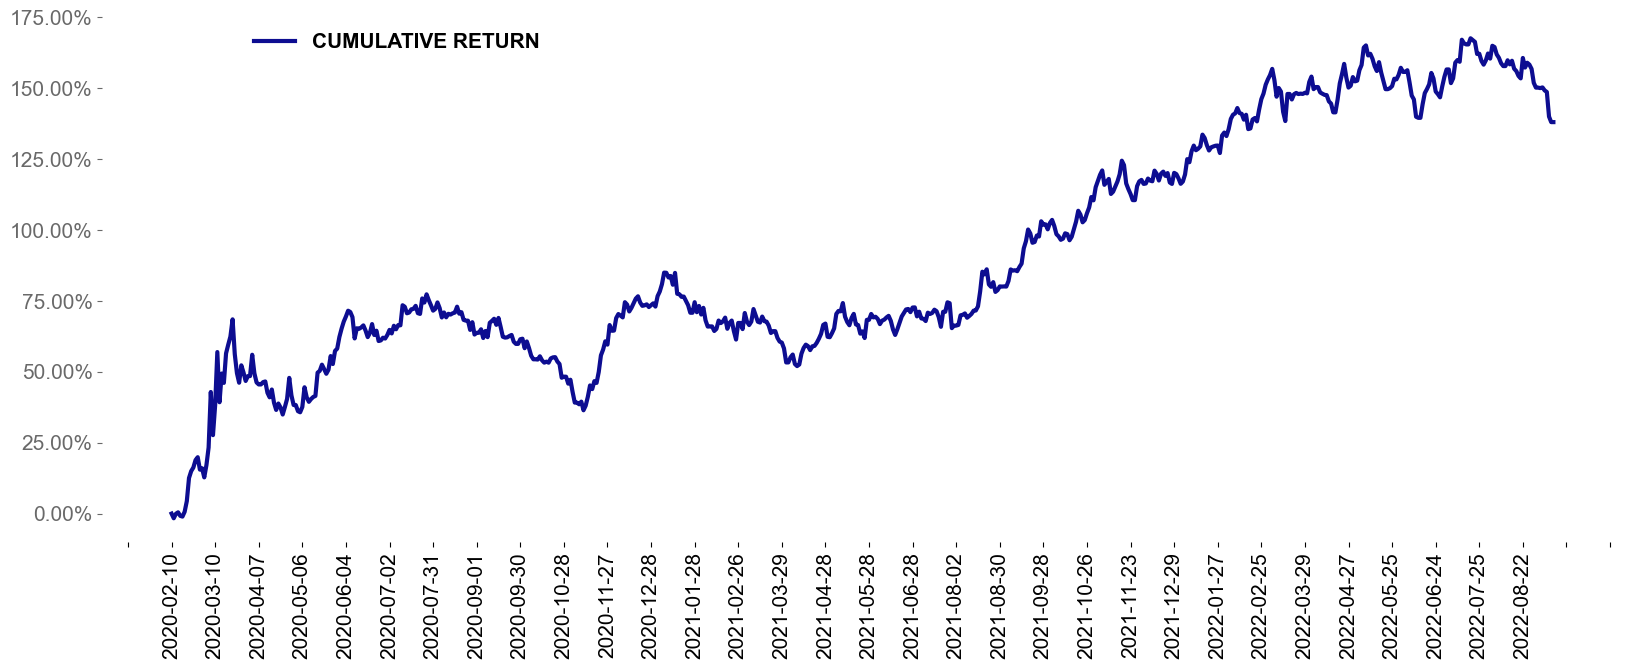

In [26]:
tick_spacing3 = 20

fig2 = plt.figure()
ax4 = fig2.add_subplot(1, 1, 1)
ax4.plot(df_trades_os['Date'],df_trades_os['cum_return'],marker='None', linestyle='solid',linewidth=3,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=3)
ax4.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.0),ncol=2,markerscale=3)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
ax4.axis([None, None, None, None])
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax4.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=2.5, top=1.2)

plt.show()